# SC1015 Mini Project

---

# a) For a Goalkeeper, which goalkeeping attribute contributes most to his overall rating? Predict the overall ratings of goalkeepers with just that attribute.

# b) For each Non-Goalkeeping Position, which non-physical attribute contributes most to each of their overall rating? Predict the overall ratings of each non-goalkeeping position players with just their respective highest correlated attribute.

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [6]:
# Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.express as ply
from plotly.subplots import make_subplots
import plotly.graph_objs as go


sb.set() # set the default Seaborn style for graphics

### Import the Fifa Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas to impart the FIFA 19 Dataset

In [7]:
fifaData = pd.read_csv('Fifa 19.csv')
fifaData.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Dropping the columns of data that cannot be used 

Firstly, we decided to drop the columns of data which contains variables that definitely cannot be used in determining the rating of a player. This is because it does not give any valuable information whatsoever.

The columns are 'ID', 'Photo', 'Flag', 'Club', 'Club Logo','Value', 'Special', 'Preferred Foot', 'Work Rate', 
               'International Reputation', 'Weak Foot', 'Position', 'Skill Moves', 'Body Type', 
               'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until' and 
               'Release Clause'
               

In [9]:
fifaData.drop(['ID', 'Photo', 'Flag', 'Club', 'Club Logo',
               'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 
               'Release Clause'], axis = 1, inplace = True)

In [10]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

### Data Cleaning: Redefining positions

We wanted to redefine positions to be broader for us to determine the relationship between their attributes and the positions.

We then decided to drop the columns of data which contains the ratings of players when placed in all positions in the field. This data is non-specific and redundant for us as we are finding correlations between their overall score instead of position-specific scores.

The columns being dropped are 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
               'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 
               'LCB', 'CB', 'RCB', and 'RB'.

In [11]:
for x in fifaData['Position']:
    if x in ['ST','CF','RW','LW', 'RF', 'LF','RS','LS']:
        fifaData['Position'].replace(to_replace=x,value='Attacker',inplace=True) 
    if x in ['LM','RM','CM','CDM','CAM', 'RCM', 'LCM', 'LDM', 'RDM', 'LAM', 'RAM']:
        fifaData['Position'].replace(to_replace=x,value='Midfielder',inplace=True)
    if x in ['LB','RB','CB', 'LCB', 'RCB','RWB','LWB']:
        fifaData['Position'].replace(to_replace=x,value='Defender',inplace=True)
    if x in ['GK']:
        fifaData['Position'].replace(to_replace=x,value='Goalkeeper',inplace=True)
        
fifaData.drop(['ST','CF','RW','LW', 'RF', 'LF','RS','LS',
               'LM','RM','CM','CDM','CAM', 'RCM', 'LCM', 'LDM', 'RDM', 'LAM', 'RAM', 'LB','RB','CB', 'LCB', 'RCB','RWB','LWB'], axis = 1, inplace = True)

In [12]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

### Now, we will analyse the number of players per position.

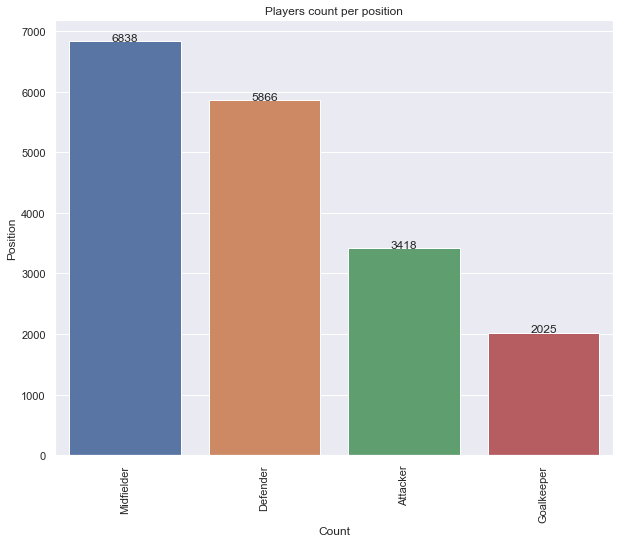

In [13]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sb.countplot(ax=ax1, data=fifaData, x='Position', order=fifaData['Position'].value_counts().head(10).index )

ax1.set(xlabel='Count',ylabel='Position',title='Players count per position',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()


### The Height of a goalkeeper might be an attribute that correlates to his rating. For this, we will clean the data by making the height a Dtype integer instead of an Object

In [14]:
#Cleaning the Height and making it Dtype integer instead of object

fifaData['Height'] = fifaData['Height'].str.replace("'", ".").astype(float)
fifaData['Height'] = fifaData['Height'].multiply(30.48).round(1)

#Renaming the column from Height to Height (cm)
fifaData = fifaData.rename(columns={'Height': 'Height (cm)'})

In [15]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

# Analysis of Goalkeeper

Goalkeeping attributes are: GKDiving, GKHandling, GKKicking, GKReflexes, GKPositioning

In [16]:
gkData = fifaData[fifaData['Position']=='Goalkeeper']

gkData =gkData[['Name', 'Age', 'Height (cm)', 'Weight', 'Overall','GKDiving',
       'GKHandling', 'GKKicking', 'GKReflexes',
       'GKPositioning']]

gkData.head()

,Name,Age,Height (cm),Weight,Overall,GKDiving,GKHandling,GKKicking,GKReflexes,GKPositioning
3,De Gea,27,195.1,168lbs,91,90.0,85.0,87.0,94.0,88.0
9,J. Oblak,25,189.0,192lbs,90,86.0,92.0,78.0,89.0,88.0
18,M. ter Stegen,26,189.0,187lbs,89,87.0,85.0,88.0,90.0,85.0
19,T. Courtois,26,201.2,212lbs,89,85.0,91.0,72.0,88.0,86.0
22,M. Neuer,32,195.1,203lbs,89,90.0,86.0,91.0,87.0,87.0


In [17]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = gkData.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = gkData.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

### We will utilise a pairplot of the attributes against the Overall rating of players to determine which goalkeeping attributes contribute the most to their overall rating.

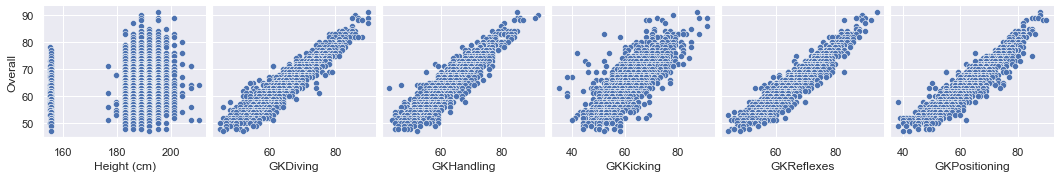

In [18]:
sb.pairplot(data=gkData,
                  y_vars=['Overall'],
                  x_vars=['Height (cm)','GKDiving',
       'GKHandling', 'GKKicking', 'GKReflexes',
       'GKPositioning'])

#### From the plot above, we obeserve that the Height of goalkeepers has no correlation to their overall rating.
#### Upon analysis of the pairplot, we can observe a high correlation between their overall rating and their positioning, as well as their reflexes. This essentially means that if a player wants to be a highly rated goalkeeper. his reflexes and/or positioning should be his priority.

# Analysis of Non-Goalkeeper

Non-physical attributes are: Positioning, Composure, Interceptions, Vision, Aggression.

In [19]:
nonGkData = fifaData[fifaData['Position']!='Goalkeeper']

nonGkData =nonGkData[['Name', 'Position', 'Age', 'Height (cm)', 'Weight','Overall','Positioning','Composure',
       'Interceptions', 'Vision', 'Aggression']]

nonGkData.head()

,Name,Position,Age,Height (cm),Weight,Overall,Positioning,Composure,Interceptions,Vision,Aggression
0,L. Messi,Attacker,31,173.7,159lbs,94,94.0,96.0,22.0,94.0,48.0
1,Cristiano Ronaldo,Attacker,33,189.0,183lbs,94,95.0,95.0,29.0,82.0,63.0
2,Neymar Jr,Attacker,26,179.8,150lbs,92,89.0,94.0,36.0,87.0,56.0
4,K. De Bruyne,Midfielder,27,155.8,154lbs,91,87.0,88.0,61.0,94.0,76.0
5,E. Hazard,Attacker,27,176.8,163lbs,91,87.0,91.0,41.0,89.0,54.0


In [36]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = nonGkData.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = nonGkData.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

### From the correlation matrixes above, we are unable to find a high correlation to overall.

### We will utilise a pairplot of the attributes against the Overall rating of players to determine which non-physical attributes contribute the most to their overall rating.

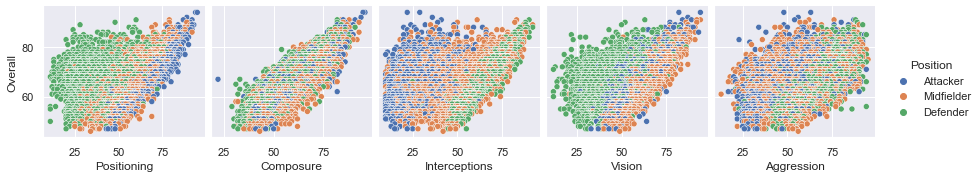

In [20]:
sb.pairplot(data=nonGkData,
                  y_vars=['Overall'],
                  x_vars=['Positioning','Composure',
       'Interceptions', 'Vision', 'Aggression'],hue='Position')


#### From the plot above, we are roughly able to see the correlation of the players' Overall ratings and their non-physical attributes based on their position.
#### For us to have a better visual of the position-specific correlations, we will plot 3 separate pairplots based on the 3 positions, Attacker, Midfielder and Defender

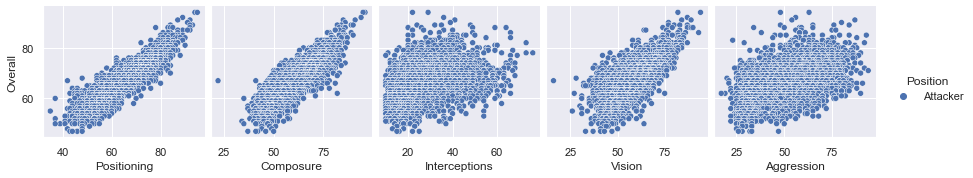

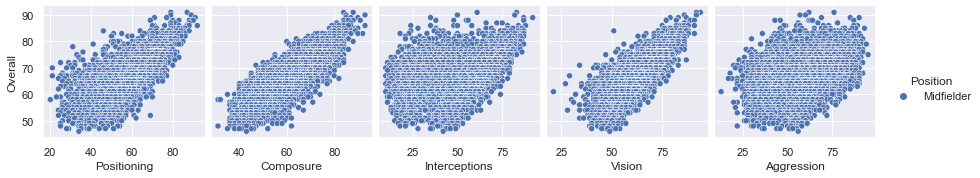

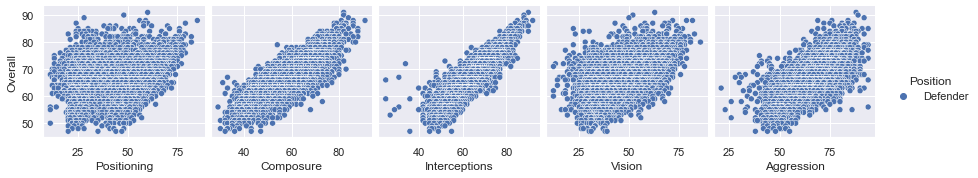

In [21]:
attData = nonGkData[nonGkData['Position']=='Attacker']
midData = nonGkData[nonGkData['Position']=='Midfielder']
defData = nonGkData[nonGkData['Position']=='Defender']
sb.pairplot(data=attData,
                  y_vars=['Overall'],
                  x_vars=['Positioning','Composure',
       'Interceptions', 'Vision', 'Aggression'],hue='Position')
sb.pairplot(data=midData,
                  y_vars=['Overall'],
                  x_vars=['Positioning','Composure',
       'Interceptions', 'Vision', 'Aggression'],hue='Position')
sb.pairplot(data=defData,
                  y_vars=['Overall'],
                  x_vars=['Positioning','Composure',
       'Interceptions', 'Vision', 'Aggression'],hue='Position')

#### Upon analysis of the pairplot, we can observe a high correlation between an Attacker's overall rating and their positioning. This essentially means that if an Attacker wants to be a highly rated player, his positioning should be his priority.
#### As for a Midfielder, there is a high correlation between his overall rating and composure, as well his vision. A Midfielder's priority should therefore be his composure and vision.
#### Finally, it is clear that for a Defender, the non-physical attribute that has the highest correlation with his overall rating is his interceptions. He should be good at intercepting the ball to be a highly rated defender.

# Prediction of Overall Rating
Before we proceed to predict the position-specific overall ratings of players, we decided to first predict regardless of position. This is so that we can conduct more analyses and test on different models to decide on the optimal one to apply for every position.

# Split into training and test data

In [22]:
from sklearn.model_selection import train_test_split

#player stat features
attributes = ['Overall', 'Special', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
fifaData = fifaData[attributes]
fifaData.head()

train_set, test_set = train_test_split(fifaData, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(fifaData))

Length of training data: 14565
Length of testing data: 3642
Length of total data: 18207


# Look for attributes with highest correlation to Overall Ratings

In [23]:
fifaData = train_set.copy()
corr_matrix = fifaData.corr()
corr_matrix['Overall'].sort_values(ascending=False)

Overall            1.000000
Reactions          0.850109
Composure          0.728750
Potential          0.662475
Special            0.610705
ShortPassing       0.506312
Vision             0.503023
LongPassing        0.487446
BallControl        0.464928
ShotPower          0.445878
LongShots          0.425478
Curve              0.424640
FKAccuracy         0.401284
Crossing           0.399549
Aggression         0.395773
Volleys            0.395685
Dribbling          0.378256
Stamina            0.366713
Positioning        0.363002
Strength           0.351498
Penalties          0.348671
HeadingAccuracy    0.344058
Finishing          0.340356
Interceptions      0.317527
Marking            0.283716
Agility            0.268593
Jumping            0.262037
StandingTackle     0.249079
SlidingTackle      0.219206
SprintSpeed        0.213782
Acceleration       0.201231
Balance            0.106820
GKPositioning     -0.021472
GKReflexes        -0.025930
GKHandling        -0.027173
GKDiving          -0

We can see from the above analysis that the top 5 attributes that correlates with a player's overall rating is his Reactions, Composure, Potential, Special and ShortPassing. We will plot graphs to visualise this.

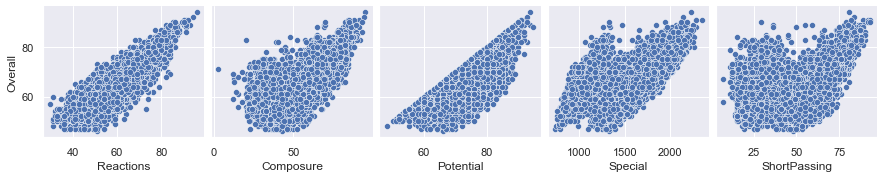

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['Reactions', 'Composure', 'Potential', 'Special', 'ShortPassing']
sb.pairplot(data=fifaData,
                  y_vars=['Overall'],
                  x_vars=attributes)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


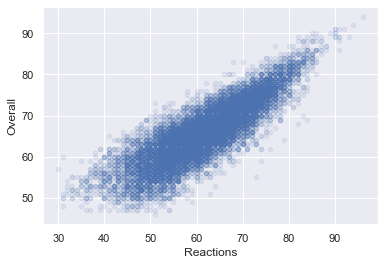

In [25]:
fifaData.plot(kind='scatter', x='Reactions', y='Overall', alpha=0.1)
plt.show()

# Now, let's prepare our training and test data.

In [26]:
fifaData[fifaData==np.inf]=np.nan
fifaData.fillna(fifaData.mean(), inplace=True)

y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Let's analyse 3 different models to determine which we will utilise for this problem

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [28]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
rmse

2.301952140565689

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train, y_train,scoring='neg_mean_squared_error', cv=10)
linear_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Mean:", scores.mean())
  print("SD:", scores.std())
display_scores(linear_scores)

Mean: 2.309028696242433
SD: 0.03150173824753752


## DecisionTree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [31]:
y_predictions = dt.predict(X_train)
dt_mse = mean_squared_error(y_train, y_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

In [32]:
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
dt_scores = np.sqrt(-scores)
display_scores(dt_scores)

Mean: 2.026774302002889
SD: 0.04707484513327475


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)

In [34]:
y_predictions = rf.predict(X_train)
rf_mse = mean_squared_error(y_train, y_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.45663021897695133

In [35]:
scores = cross_val_score(RandomForestRegressor(), X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
rf_scores = np.sqrt(-scores)
display_scores(rf_scores)

KeyboardInterrupt: 

In [ ]:
final_predictions = rf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


1.1938422573899488

#### From our testing of the 3 models, we can conclude that Random Forest works the best for our problem. It has the lowest RMSE of 0.45 and lowest mean and standard deviation of 1.21 and 0.04 respectively. We will use this as our prediction model

In [ ]:
some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]

for i in range(len(some_label)):
    print("Prediction:", rf.predict(some_data)[i], "\tActual:", list(some_label)[i])

Prediction: 69.1 	Actual: 69
Prediction: 59.86 	Actual: 61
Prediction: 63.07 	Actual: 64
Prediction: 68.93 	Actual: 69
Prediction: 73.39 	Actual: 75
Prediction: 72.58 	Actual: 72
Prediction: 56.29 	Actual: 62
Prediction: 65.08 	Actual: 66
Prediction: 64.98 	Actual: 67
Prediction: 65.5 	Actual: 66


#### We can see that the prediction is more or less accurate. We will proceed to address our problem.

# Prediction for Goalkeeper

In [ ]:
attributes = ['Overall','GKReflexes']
gkData = gkData[attributes]
gkData.head()
train_set, test_set = train_test_split(gkData, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(gkData))

Length of training data: 1620
Length of testing data: 405
Length of total data: 2025


In [ ]:
gkData[gkData==np.inf]=np.nan
gkData.fillna(gkData.mean(), inplace=True)

y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

/var/folders/tk/72_k71rs61z15mnm3xtx97nc0000gn/T/ipykernel_9501/3450108499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gkData[gkData==np.inf]=np.nan
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

final_predictions = rf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]

for i in range(len(some_label)):
    print("Prediction:", rf.predict(some_data)[i], "\tActual:", list(some_label)[i])

Prediction: 48.868476190476194 	Actual: 51
Prediction: 60.05300965180948 	Actual: 56
Prediction: 65.9822354346995 	Actual: 69
Prediction: 61.85517228424883 	Actual: 65
Prediction: 57.08477943296064 	Actual: 63
Prediction: 60.85951551671842 	Actual: 57
Prediction: 75.32735011790177 	Actual: 76
Prediction: 69.29715449010926 	Actual: 71
Prediction: 64.67184128081058 	Actual: 62
Prediction: 75.32735011790177 	Actual: 74


In [ ]:
gkData = train_set.copy()
corr_matrix = gkData.corr()
corr_matrix['Overall'].sort_values(ascending=False)

Overall       1.000000
GKReflexes    0.940396
Name: Overall, dtype: float64

# Prediction for Attacker


In [ ]:
attributes = ['Overall','Positioning']
attData = attData[attributes]
attData.head()
train_set, test_set = train_test_split(attData, test_size=0.2, random_state=42)

In [ ]:
attData[attData==np.inf]=np.nan
attData.fillna(attData.mean(), inplace=True)

y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

final_predictions = rf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]

for i in range(len(some_label)):
    print("Prediction:", rf.predict(some_data)[i], "\tActual:", list(some_label)[i])

Prediction: 61.55585469527626 	Actual: 65
Prediction: 60.12492621166649 	Actual: 56
Prediction: 79.25188152680151 	Actual: 78
Prediction: 75.59606841266901 	Actual: 72
Prediction: 62.34372076113596 	Actual: 60
Prediction: 64.97576415878407 	Actual: 66
Prediction: 62.34372076113596 	Actual: 55
Prediction: 63.38928322927518 	Actual: 66
Prediction: 60.6499245203036 	Actual: 60
Prediction: 62.45204210938122 	Actual: 64


# Prediction for Midfielder


In [ ]:
attributes = ['Overall','Composure','Vision']
midData = midData[attributes]
midData.head()
train_set, test_set = train_test_split(midData, test_size=0.2, random_state=42)

In [ ]:
midData = train_set.copy()
corr_matrix = midData.corr()
corr_matrix['Overall'].sort_values(ascending=False)

Overall      1.000000
Composure    0.802220
Vision       0.791871
Name: Overall, dtype: float64

In [ ]:
midData[midData==np.inf]=np.nan
midData.fillna(midData.mean(), inplace=True)

y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

final_predictions = rf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]

for i in range(len(some_label)):
    print("Prediction:", rf.predict(some_data)[i], "\tActual:", list(some_label)[i])

Prediction: 65.71533086358086 	Actual: 67
Prediction: 64.35666666666665 	Actual: 66
Prediction: 71.40708576880637 	Actual: 77
Prediction: 62.40588689088688 	Actual: 60
Prediction: 64.90832694962418 	Actual: 67
Prediction: 50.1583492063492 	Actual: 58
Prediction: 73.30716533262768 	Actual: 72
Prediction: 71.4540549719888 	Actual: 75
Prediction: 62.23339557664557 	Actual: 59
Prediction: 58.45240476190475 	Actual: 61


# Prediction for Defender


In [ ]:
attributes = ['Overall','Interceptions']
defData = defData[attributes]
defData.head()
train_set, test_set = train_test_split(defData, test_size=0.2, random_state=42)

In [ ]:
defData[defData==np.inf]=np.nan
defData.fillna(defData.mean(), inplace=True)

y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

/var/folders/tk/72_k71rs61z15mnm3xtx97nc0000gn/T/ipykernel_9501/545540780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defData[defData==np.inf]=np.nan
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

final_predictions = rf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]

for i in range(len(some_label)):
    print("Prediction:", rf.predict(some_data)[i], "\tActual:", list(some_label)[i])

Prediction: 56.25960670693998 	Actual: 65
Prediction: 60.18445730394499 	Actual: 62
Prediction: 73.2907909752429 	Actual: 78
Prediction: 79.49864160397476 	Actual: 76
Prediction: 59.44600934459024 	Actual: 57
Prediction: 66.41702704973457 	Actual: 62
Prediction: 68.39172922820606 	Actual: 68
Prediction: 60.6357316331089 	Actual: 63
Prediction: 75.12195262239227 	Actual: 73
Prediction: 64.41982974471497 	Actual: 64


# Conclusion
We are able to predict the overall ratings of players fairly well based solely on their highest correlated goalkeeping/non-physical attribute.


# Takeaways
The takeaway from this project will be the methods we used to actually clean the data and analyse the different relationships based on the different values of a specific column. In this project, we used the different player positions to actually analyse the correlation between their attributes and their overall rating. This is essential as different positions in football is attributed to different playing styles and traits.

This project also shown that we can create a Machine Learning Model to predict a player's overall rating based solely on the highest correlated goalkeeping/non-physical trait for their position. We learned how to compare and utilise different models to suit our needs for prediction.